<a href="https://colab.research.google.com/github/anjalinagel12/Google-colab-notebook/blob/master/Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *


In [0]:
folder = 'aadhar'
file = 'aadhar.txt'

In [0]:
folder = 'pan'
file = 'pan.txt'

In [0]:
folder = 'passport'
file = 'passport.txt'

In [0]:
folder = 'dl'
file = 'dl.txt'

In [0]:
folder = 'voterid'
file = 'voterid.txt'

In [0]:
path = Path('data/documents')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
ls

data/  sample_data/


In [0]:
mv voterid.txt data/documents

In [0]:
path.ls()


[PosixPath('data/documents/pan.txt'),
 PosixPath('data/documents/voterid.txt'),
 PosixPath('data/documents/dl.txt'),
 PosixPath('data/documents/passport.txt'),
 PosixPath('data/documents/aadhar.txt'),
 PosixPath('data/documents/aadhar')]

In [0]:
download_images(path/file, dest, max_pics=200)


Error https://www.metrotvonline.com/wp-content/uploads/2018/08/viter-id.jpg HTTPSConnectionPool(host='www.metrotvonline.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/08/viter-id.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://ceodelhi.gov.in/images/english-Popup.jpg?v=12345 HTTPSConnectionPool(host='ceodelhi.gov.in', port=443): Max retries exceeded with url: /images/english-Popup.jpg?v=12345 (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error http://imgsdown.1mobile.com/group1/M00/8B/90/S36rZlhT_PuAU1wPAAUkYLAekSI095.png HTTPConnectionPool(host='imgsdown.1mobile.com', port=80): Max retries exceeded with url: /group1/M00/8B/90/S36rZlhT_PuAU1wPAAUkYLAekSI095.png (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f447e684908>, 'Connection to imgsdown.1mobile.com timed out. (connect timeout=4)'

In [0]:
ls

data/  gdrive/  sample_data/


In [0]:
cd gdrive

/content/gdrive


In [0]:
cd My Drive

/content/gdrive/My Drive


In [0]:
mv AADDHAR content/data/

In [0]:
classes = ['aadhar','pan','passport','voterid','dl']


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


aadhar


pan


passport


voterid


dl


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes


['aadhar', 'dl', 'pan', 'passport', 'voterid']

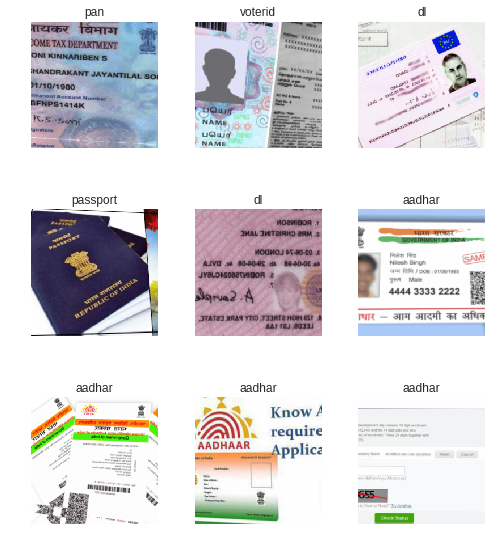

In [0]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['aadhar', 'dl', 'pan', 'passport', 'voterid'], 5, 369, 92)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)


In [0]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,accuracy
1,1.903089,1.324111,0.521739
2,1.474164,0.762322,0.739130
3,1.188831,0.652732,0.804348
4,1.023702,0.624110,0.782609


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-04


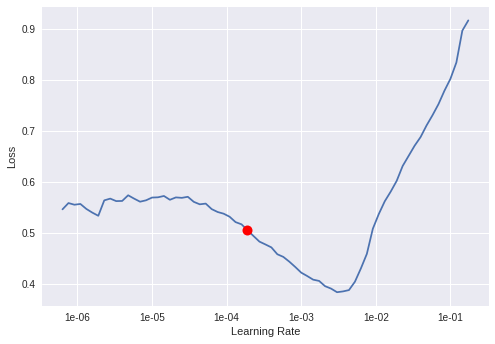

In [0]:
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(6, max_lr=slice(3e-4,3e-3))


epoch,train_loss,valid_loss,accuracy
1,0.617385,0.662715,0.782609
2,0.523610,1.774727,0.586957
3,0.473516,1.439879,0.760870
4,0.413310,1.003616,0.815217
5,0.358779,0.785146,0.869565
6,0.320282,0.635378,0.880435


In [0]:
learn.save('stage-2')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


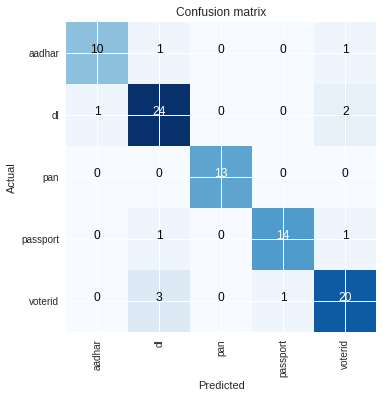

In [0]:
interp.plot_confusion_matrix()


In [0]:
learn.save('stage-2')


In [0]:
from fastai.widgets import *


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)


In [0]:
ImageCleaner(ds, idxs, path)


In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)


In [0]:
learn.export()


In [0]:
defaults.device = torch.device('cuda')


In [0]:
img = open_image(path/'pan'/'00000004.jpg')


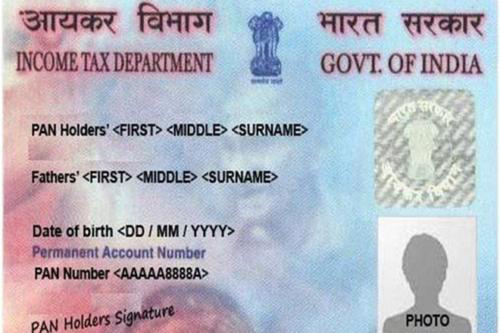

In [0]:
img

In [0]:
learn = load_learner(path)


In [0]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category pan